In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from env import host, user, password
from acquire import get_telco_data
import prepare as p
import explore as e

# Acquire

In [2]:
df = get_telco_data()

In [3]:
df.head(1).T

,0
payment_type_id,2
contract_type_id,1
internet_service_type_id,3
customer_id,0030-FNXPP
gender,Female
senior_citizen,0
partner,No
dependents,No
tenure,3
phone_service,Yes


**Things I am noticing so far that will need to be addressed:**
- total charges has incorrect data type and will need to be changed
- many columns are redundant and will need to be dropped (numeric coding of plan types has already been converted to string types via join so numeric columns are no longer needed)
- could add additional features that combine other columns (service_type, partner_dependents)
- Will need to convert all categorical columns into object dtypes or booleans


In [4]:
df.shape

(7043, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   contract_type_id          7043 non-null   int64  
 2   internet_service_type_id  7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [6]:
# drop the first three columns since we have info in other columns and will make dummy columns for encoding later
# drop the customer id column since it is only object column that I don't want to treat as categorical and we don't need it anymore as the index will serve as unique identifier 
df.drop(columns = ['payment_type_id', 'contract_type_id', 'internet_service_type_id', 'customer_id'], inplace=True)

In [7]:
# change dtype of total charges to float

# first, we need to replace all empty columns with a 0

df.total_charges.replace(to_replace={' ' : '0'}, inplace = True)

In [8]:
# now convert the column to float data type

df.total_charges = df.total_charges.astype('float')

In [9]:
df.senior_citizen = np.where(df.senior_citizen == 1, 'Yes', 'No')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 7043 non-null   object 
 1   senior_citizen         7043 non-null   object 
 2   partner                7043 non-null   object 
 3   dependents             7043 non-null   object 
 4   tenure                 7043 non-null   int64  
 5   phone_service          7043 non-null   object 
 6   multiple_lines         7043 non-null   object 
 7   online_security        7043 non-null   object 
 8   online_backup          7043 non-null   object 
 9   device_protection      7043 non-null   object 
 10  tech_support           7043 non-null   object 
 11  streaming_tv           7043 non-null   object 
 12  streaming_movies       7043 non-null   object 
 13  paperless_billing      7043 non-null   object 
 14  monthly_charges        7043 non-null   float64
 15  tota

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
monthly_charges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
total_charges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


In [12]:
# plot distribution of numeric columns

# create a list of numeric column names

num_cols = df.select_dtypes(include = 'number').columns
num_cols

# loop through the list and plot a histogram for each numeric column

Index(['tenure', 'monthly_charges', 'total_charges'], dtype='object')

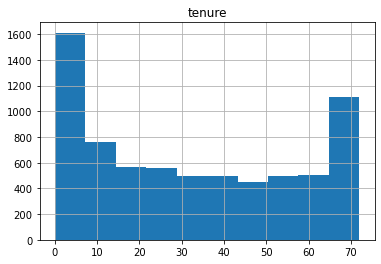

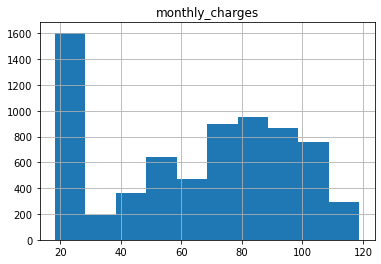

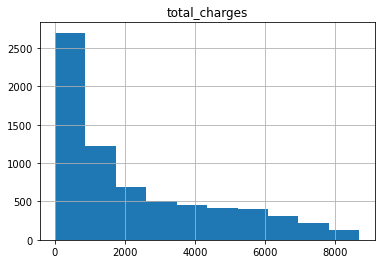

In [13]:
for col in num_cols:
    df.hist(col)
    plt.title(col)
    plt.show()

In [14]:
# describe object columns

obj_cols = df.select_dtypes(include = 'object').columns

for col in obj_cols:
    print(df[col].value_counts())
    print('\n')
    
    print(df[col].value_counts(normalize=True, dropna = False))
    print('---------------------------------\n')


Male      3555
Female    3488
Name: gender, dtype: int64


Male      0.504756
Female    0.495244
Name: gender, dtype: float64
---------------------------------

No     5901
Yes    1142
Name: senior_citizen, dtype: int64


No     0.837853
Yes    0.162147
Name: senior_citizen, dtype: float64
---------------------------------

No     3641
Yes    3402
Name: partner, dtype: int64


No     0.516967
Yes    0.483033
Name: partner, dtype: float64
---------------------------------

No     4933
Yes    2110
Name: dependents, dtype: int64


No     0.700412
Yes    0.299588
Name: dependents, dtype: float64
---------------------------------

Yes    6361
No      682
Name: phone_service, dtype: int64


Yes    0.903166
No     0.096834
Name: phone_service, dtype: float64
---------------------------------

No                  3390
Yes                 2971
No phone service     682
Name: multiple_lines, dtype: int64


No                  0.481329
Yes                 0.421837
No phone service    0.096834
Name

In [15]:
# check for nulls
df.isnull().sum()

gender                   0
senior_citizen           0
partner                  0
dependents               0
tenure                   0
phone_service            0
multiple_lines           0
online_security          0
online_backup            0
device_protection        0
tech_support             0
streaming_tv             0
streaming_movies         0
paperless_billing        0
monthly_charges          0
total_charges            0
churn                    0
internet_service_type    0
contract_type            0
payment_type             0
dtype: int64

In [16]:
# rerun preparation using prepare.py module

df = get_telco_data()

In [17]:
df.head()

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,2,1,3,0030-FNXPP,Female,0,No,No,3,Yes,...,No internet service,No internet service,No internet service,No,19.85,57.2,No,None,Month-to-month,Mailed check
1,2,1,3,0031-PVLZI,Female,0,Yes,Yes,4,Yes,...,No internet service,No internet service,No internet service,No,20.35,76.35,Yes,None,Month-to-month,Mailed check
2,1,1,3,0098-BOWSO,Male,0,No,No,27,Yes,...,No internet service,No internet service,No internet service,Yes,19.40,529.8,No,None,Month-to-month,Electronic check
3,1,1,3,0107-WESLM,Male,0,No,No,1,Yes,...,No internet service,No internet service,No internet service,Yes,19.85,19.85,Yes,None,Month-to-month,Electronic check
4,3,1,3,0114-RSRRW,Female,0,Yes,No,10,Yes,...,No internet service,No internet service,No internet service,Yes,19.95,187.75,No,None,Month-to-month,Bank transfer (automatic)


# Prepare

#### Create dummy variables for categorical columns

In [18]:
df.columns

Index(['payment_type_id', 'contract_type_id', 'internet_service_type_id',
       'customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'internet_service_type', 'contract_type',
       'payment_type'],
      dtype='object')

In [19]:
# create a list of all categorical columns

cat_cols = df.select_dtypes(include='object').columns.tolist()

In [20]:
dummy_df = pd.get_dummies(df[cat_cols], drop_first = True)

In [21]:
dummy_df.head()

,customer_id_0003-MKNFE,customer_id_0004-TLHLJ,customer_id_0011-IGKFF,customer_id_0013-EXCHZ,customer_id_0013-MHZWF,customer_id_0013-SMEOE,customer_id_0014-BMAQU,customer_id_0015-UOCOJ,customer_id_0016-QLJIS,customer_id_0017-DINOC,...,total_charges_999.8,total_charges_999.9,churn_Yes,internet_service_type_Fiber optic,internet_service_type_None,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [22]:
# concat dummy columns to original df but save to new df so we can use original df for exploration
df_w_dummies = pd.concat([df, dummy_df], axis=1)

In [23]:
df_w_dummies.head()

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,total_charges_999.8,total_charges_999.9,churn_Yes,internet_service_type_Fiber optic,internet_service_type_None,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,2,1,3,0030-FNXPP,Female,0,No,No,3,Yes,...,0,0,0,0,1,0,0,0,0,1
1,2,1,3,0031-PVLZI,Female,0,Yes,Yes,4,Yes,...,0,0,1,0,1,0,0,0,0,1
2,1,1,3,0098-BOWSO,Male,0,No,No,27,Yes,...,0,0,0,0,1,0,0,0,1,0
3,1,1,3,0107-WESLM,Male,0,No,No,1,Yes,...,0,0,1,0,1,0,0,0,1,0
4,3,1,3,0114-RSRRW,Female,0,Yes,No,10,Yes,...,0,0,0,0,1,0,0,0,0,0


In [24]:
# drop columns that were just dummied
df_w_dummies.drop(columns=cat_cols, inplace=True)

In [25]:
df_w_dummies.head()

,payment_type_id,contract_type_id,internet_service_type_id,senior_citizen,tenure,monthly_charges,customer_id_0003-MKNFE,customer_id_0004-TLHLJ,customer_id_0011-IGKFF,customer_id_0013-EXCHZ,...,total_charges_999.8,total_charges_999.9,churn_Yes,internet_service_type_Fiber optic,internet_service_type_None,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,2,1,3,0,3,19.85,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,2,1,3,0,4,20.35,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2,1,1,3,0,27,19.40,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,1,1,3,0,1,19.85,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
4,3,1,3,0,10,19.95,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


#### Split data into train/validate/test

In [26]:
# 60% train, 20% validate, 20% test
train, test = train_test_split(df_w_dummies, test_size=.2, random_state=123, stratify=df_w_dummies.churn_Yes)
train, validate = train_test_split(train, test_size=.25, random_state=123, stratify=train.churn_Yes)

In [27]:
# see shape of new dfs
train.shape, validate.shape, test.shape

((4225, 13605), (1409, 13605), (1409, 13605))

In [28]:
# make sure split proportions worked properly
train.shape[0]/df_w_dummies.shape[0], validate.shape[0]/df_w_dummies.shape[0], test.shape[0]/df_w_dummies.shape[0]

(0.5998864120403238, 0.20005679397983814, 0.20005679397983814)

In [29]:
df_w_dummies.isnull().sum()

payment_type_id                         0
contract_type_id                        0
internet_service_type_id                0
senior_citizen                          0
tenure                                  0
                                       ..
contract_type_One year                  0
contract_type_Two year                  0
payment_type_Credit card (automatic)    0
payment_type_Electronic check           0
payment_type_Mailed check               0
Length: 13605, dtype: int64

In [30]:
# no nulls, therefore imputation is not necessary here

In [31]:
# test this using functions from prepare module

In [32]:
df = get_telco_data()

In [33]:
df.head()

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,2,1,3,0030-FNXPP,Female,0,No,No,3,Yes,...,No internet service,No internet service,No internet service,No,19.85,57.2,No,None,Month-to-month,Mailed check
1,2,1,3,0031-PVLZI,Female,0,Yes,Yes,4,Yes,...,No internet service,No internet service,No internet service,No,20.35,76.35,Yes,None,Month-to-month,Mailed check
2,1,1,3,0098-BOWSO,Male,0,No,No,27,Yes,...,No internet service,No internet service,No internet service,Yes,19.40,529.8,No,None,Month-to-month,Electronic check
3,1,1,3,0107-WESLM,Male,0,No,No,1,Yes,...,No internet service,No internet service,No internet service,Yes,19.85,19.85,Yes,None,Month-to-month,Electronic check
4,3,1,3,0114-RSRRW,Female,0,Yes,No,10,Yes,...,No internet service,No internet service,No internet service,Yes,19.95,187.75,No,None,Month-to-month,Bank transfer (automatic)


In [34]:
df = p.prepare_telco(df)

In [35]:
df.head()

AttributeError: 'tuple' object has no attribute 'head'

In [ ]:
train, validate, test = p.dummy_and_split(df)

In [ ]:
# see shape of new dfs
train.shape, validate.shape, test.shape

In [ ]:
train.head()

In [ ]:
# seems to be working properly so far